<a href="https://colab.research.google.com/github/praveendhananjaya/deep-learning/blob/main/regression_with_K-fold/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#house prices

*Regression* machine learning

###Boston Housing Price dataset



In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

65536/57026 [==================================] - 0s 0us/step
(404, 13)
(102, 13)


404 training samples and 102 test samples, each with 13
numerical features, such as per capita crime rate, average number of rooms per dwell-
ing, accessibility to highways, and so on

The targets are the median values of owner-occupied homes, in thousands of
dollars:

In [3]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

##Preparing the data

It would be problematic to feed into a neural network values that all take wildly differ-
ent ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation. This is easily done in Numpy.

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

##Building your network

two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.


In [5]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation = 'relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation = 'relu' ))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

  

The network ends with a single unit and no activation (it will be a linear layer).This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value).Applying an activation function would constrain the range the output can take; (for instance, if applied a sigmoid activation function to the last layer,the network could only learn to predict values between 0 and 1.)


**mse** loss function— *mean squared error,*
square of the difference between the predictions and the targets



***mean absolute error ( MAE )***. It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.



## Validating your approach using K-fold validation

The best practice in such situations is to use K -fold cross-validation (see figure 3.11).
It consists of splitting the available data into K partitions (typically K = 4 or 5), instanti-
ating K identical models, and training each one on K – 1 partitions while evaluating on
the remaining partition. The validation score for the model used is then the average of
the K validation scores obtained. In terms of code, this is straightforward.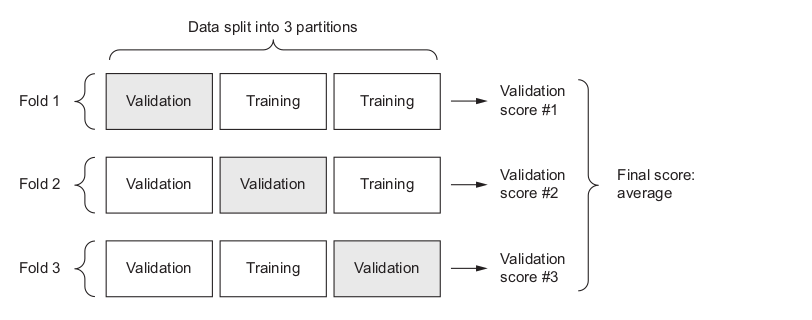

In [6]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [7]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0
    )
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


print(all_scores)
print(np.mean(all_scores))  



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[1.9579027891159058, 2.668773889541626, 2.9047539234161377, 2.549445152282715]
2.520218938589096


In [8]:
print(all_scores)
print(np.mean(all_scores))  

[1.9579027891159058, 2.668773889541626, 2.9047539234161377, 2.549445152282715]
2.520218938589096


500 epochs

In [9]:
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    
    print(history.history.keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold # 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


[[3.784846305847168, 2.9443020820617676, 2.6846230030059814, 2.490752696990967, 2.8227436542510986, 2.250558376312256, 2.2025015354156494, 2.127606153488159, 2.2686612606048584, 2.205557107925415, 2.1839327812194824, 2.0268959999084473, 1.9381155967712402, 2.231043815612793, 2.0381925106048584, 1.9851648807525635, 2.0862553119659424, 1.89030921459198, 2.306523084640503, 2.334613084793091, 2.5674238204956055, 2.1938540935516357, 2.262704372406006, 1.9670511484146118, 1.8739545345306396, 2.025463104248047, 2.1795709133148193, 2.0730886459350586, 2.2142276763916016, 1.8992207050323486, 2.084576368331909, 2.1018052101135254, 2.4065115451812744, 1.9047625064849854, 2.0848679542541504, 1.9742697477340698, 1.8611066341400146, 1.9093255996704102, 1.8997882604599, 1.9849332571029663, 1.8481812477111816, 1.889351725578308, 2.0295157432556152, 2.043156385421753, 2.0154871940612793, 1.9527561664581299, 2.0101709365844727, 1.9547696113586426, 2.3315985202789307, 1.9158159494400024, 2.02573728561401

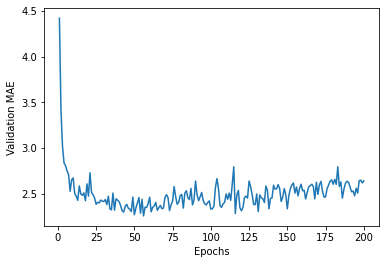

In [10]:
print(all_mae_histories)
print(np.mean(all_mae_histories))

import matplotlib.pyplot as plt

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
  

It may be a little difficult to see the plot, due to scaling issues and relatively high vari-
ance. Let’s do the following:



*   Omit the first 10 data points, which are on a different scale than the rest of the curve.
*    Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.






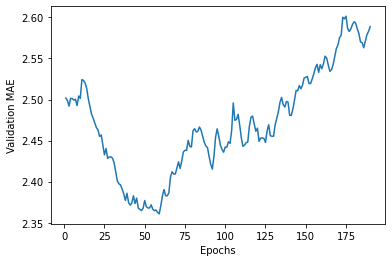

In [11]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, validation MAE stops improving significantly after 80 epochs.
Past that point, you start overfitting.

In [12]:
model = build_model()
model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 19.0756 - mae: 2.6056
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [23]:
print(test_data[0])

samples_to_predict = np.array([test_data[20]])

model.predict_proba(samples_to_predict)

[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[11.544668]], dtype=float32)